# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [32]:
def predict_sex(name):
    name=str(name).split(' ')[0]
    sex_prediction = gender.Detector(case_sensitive=False)
    sex=sex_prediction.get_gender(name)
    sex_dic={'female':2,"male":1,'unknown':0,'mostly_female':-2 ,'mostly_male':-1,'andy':-3}
    return sex_dic[sex]

def creation_year(year):
    try:
        dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
        return dt.year
    except:
        return 0

def set_sex_code(x):
    x.loc[:,'sex_code']=predict_sex(x['name'])




# result

all the data

Accuracy: 89.76%

 Training Accuracy score: 0.9999632825408482
Testing Accuracy score: 0.8976354824496989
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2309
           1       0.90      0.95      0.92      4500

    accuracy                           0.90      6809
   macro avg       0.89      0.87      0.88      6809
weighted avg       0.90      0.90      0.90      6809



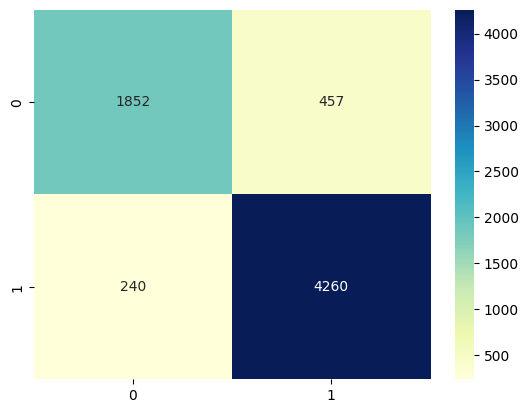

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

Accuracy: 86.71%

 Training Accuracy score: 0.9999265650816963
Testing Accuracy score: 0.8670876780731385
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      2309
           1       0.88      0.92      0.90      4500

    accuracy                           0.87      6809
   macro avg       0.86      0.84      0.85      6809
weighted avg       0.87      0.87      0.87      6809



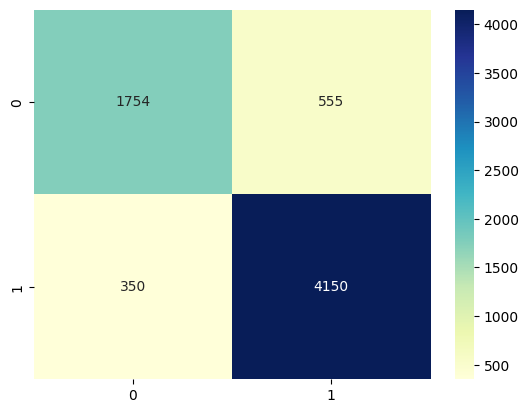

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersampling  + Standardizing

In [34]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier
# df = pd.read_csv('./Data/datavf.csv')

# x=df.iloc[:, :-2]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), # Transforming the data with PCA
#     ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

random undersampling 

In [35]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier
# df = pd.read_csv('./Data/datavf.csv')

# x=df.iloc[:, :-2]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()


TomekLinks undersimpling 

1    20727
0    11543
dtype: int64
Accuracy: 90.61%

 Training Accuracy score: 0.9999225286643941
Testing Accuracy score: 0.906104741245739
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      2309
           1       0.91      0.95      0.93      4145

    accuracy                           0.91      6454
   macro avg       0.90      0.89      0.90      6454
weighted avg       0.91      0.91      0.91      6454



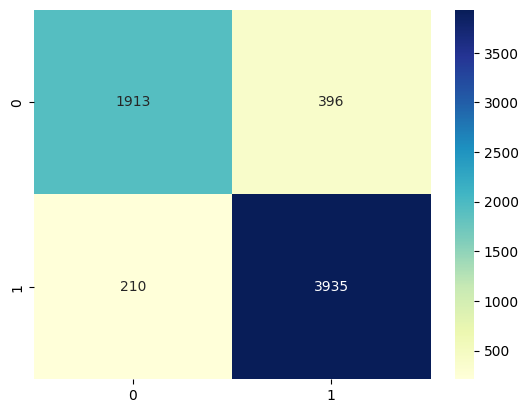

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)
my_series = pd.Series(y)
value_counts = my_series.value_counts()
print(value_counts)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Accuracy: 88.44%

 Training Accuracy score: 0.9998917045700672
Testing Accuracy score: 0.884365526201819
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2309
           1       0.88      0.90      0.89      2309

    accuracy                           0.88      4618
   macro avg       0.88      0.88      0.88      4618
weighted avg       0.88      0.88      0.88      4618



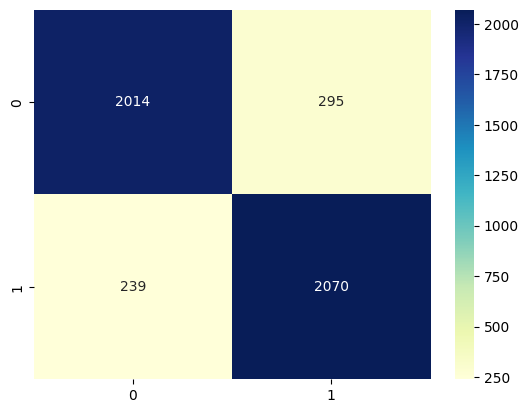

In [37]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import gender_guesser.detector as gender

# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from imblearn.under_sampling import TomekLinks
# df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# x, y = tl.fit_resample(x, y)
# # Convert the list to a DataFrame
# y = pd.DataFrame({'account_type': y})

# # Concatenate the two DataFrames
# data = pd.concat([x, y], axis=1)
# df1=data[data.account_type== 1].head(11543)
# df2=data[data.account_type== 0].head(11543)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# clf=RandomForestClassifier()
# clf.fit(x_train,y_train)
# score = clf.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = clf.predict(x_train)
# y_pred_test = clf.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

oversampling

Accuracy: 90.67%

 Training Accuracy score: 0.9998888919752229
Testing Accuracy score: 0.9066770358849017
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      4501
           1       0.90      0.91      0.91      4500

    accuracy                           0.91      9001
   macro avg       0.91      0.91      0.91      9001
weighted avg       0.91      0.91      0.91      9001



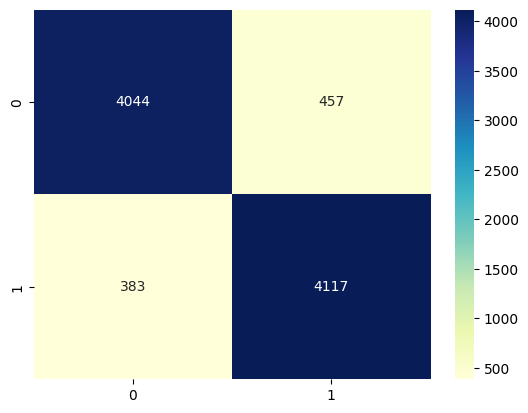

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+descvf.csv')

smote = SMOTE(random_state=10)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y =smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with column relation

-oversimpling

Accuracy: 90.41%

 Training Accuracy score: 0.9998333379628344
Testing Accuracy score: 0.9041217642484168
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4501
           1       0.90      0.92      0.91      4500

    accuracy                           0.90      9001
   macro avg       0.90      0.90      0.90      9001
weighted avg       0.90      0.90      0.90      9001



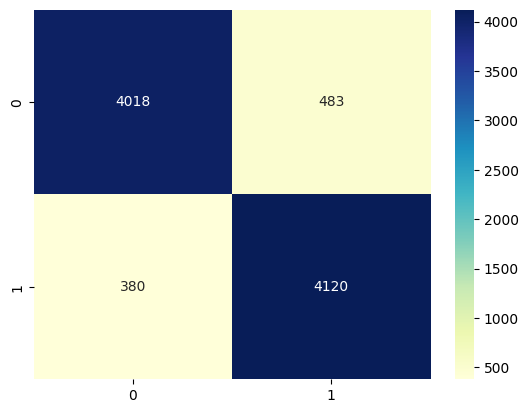

In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
df = pd.read_csv('./Data/data+column_relation.csv')

x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-random undersimpling

In [40]:

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import gender_guesser.detector as gender
# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# data1 = pd.read_csv('./Data/data+column_relation.csv')
# data1=data1.drop(labels=['Unnamed: 0'],axis=1)
# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
# ])
# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)
# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

tomklink undersimpling

Accuracy: 89.70%

 Training Accuracy score: 0.9999221880714314
Testing Accuracy score: 0.8969810146280734
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      2309
           1       0.90      0.94      0.92      4117

    accuracy                           0.90      6426
   macro avg       0.89      0.88      0.89      6426
weighted avg       0.90      0.90      0.90      6426



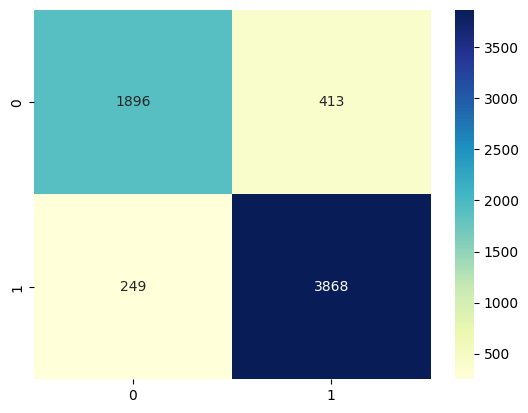

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+column_relation.csv')

tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# with features selection

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]

# followers/lastpost - followers :negative 
# engagment rate - followers :positive 
# following - following/years:negative
# followers/lastpost - engagment rate : negative 
# tweet by houre -tweet by day : positive 


# 'verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week', 'following/years', 'followers/lastpost',
#        'engagment_rate', 'description', 'screen_name', 'account_type'

# df=df.loc[:,['verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week','description','screen_name','account_type']]



# the best

- random undersimpling 

In [43]:
# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

- oversimpling

Accuracy: 90.73%

 Training Accuracy score: 0.9999444459876115
Testing Accuracy score: 0.9073436284857238
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4501
           1       0.90      0.92      0.91      4500

    accuracy                           0.91      9001
   macro avg       0.91      0.91      0.91      9001
weighted avg       0.91      0.91      0.91      9001



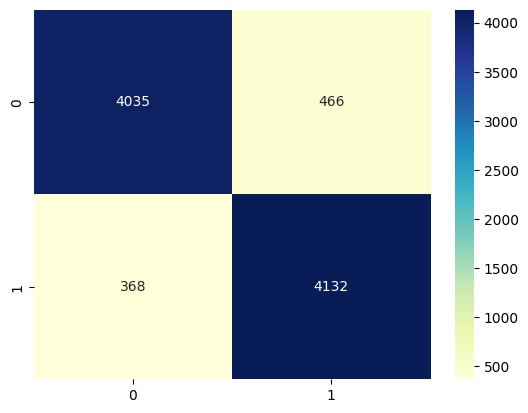

In [11]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 89.42%

 Training Accuracy score: 0.9999219603558608
Testing Accuracy score: 0.8941947565543071
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      2309
           1       0.90      0.94      0.92      4099

    accuracy                           0.89      6408
   macro avg       0.89      0.88      0.88      6408
weighted avg       0.89      0.89      0.89      6408



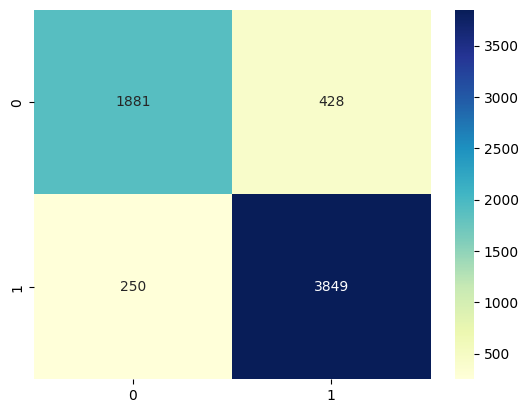

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

#  cross validation

oversimpling

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
df=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE


x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf=RandomForestClassifier( random_state=42 )
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8398758843713743 /90

Average CV Score:  0.8319204719938778


random undersimpling

In [1]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import gender_guesser.detector as gender
# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# data1 = pd.read_csv('./Data/data+column_relation.csv')
# data1=data1.loc[:,[ 'statuses', 'date_joined',
#        'most_recent_post', 'following', 'followers',  'favourites', 'lists',
#           'tweets_this_week','retweet', 'retweeted_count',
#         'userNameScore', 
#        'avg_tweets_by_day_of_week', 
#        'engagment_rate', 'description', 'screen_name', 'account_type']]
# from sklearn.model_selection import KFold, cross_val_score
# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# k_folds = KFold(n_splits = 10)
# clf=RandomForestClassifier()
# scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.7206363636363636 /93



Average CV Score:  0.7206363636363636


the Final Data 

In [2]:
import pandas as pd 
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate','screen_name', 'account_type']]
df = pd.DataFrame(data1)

# save the DataFrame to a CSV file
df.to_csv('./Data/dataFinal.csv', index=False)